# Advanced Machine Learning


## Learning Objective

- Know the difference between supervised and unsupervised learning
- Apply Machine learning framework *sklearn* to Regression and classification problems
- Learn advaned algorithms like KNN and Random Forest, which is an ensemble learning technique
- Know what is an hyperparameters and how to search for optimal hyperparameters
- Learn features selection using machine learning models

## Supervised Vs. Unsupervised Learning

All machine learning (ML) tasks are classified into two broad categories:

1. **Supervised Learning** - In supervised learning, the examples have inputs variables and the corresponding outcome. The algorithms learn from the examples and predict what the outcome will be if new values for the input variables are available in the future. Regression and classification problems are supervised learning algorithms. 
2. **Unsupervised Learning** - The examples have only inputs, but no output. The algorithm learns the structure in the inputs. Clustering is an example of unsupervised learning.

## Deep dive into how machines learn?

- In supervised learning, the algorithm learns a function which maps the inputs to the desired output. The function always has an element of error, which is the difference between what it predicts and what the actual outcome is. 

- The sum of all errors across all examples is called cost function.

For example,

The functional form of a Linear Regression model is,

$Y$ = $\beta_{0} + \beta_{1} X+ \epsilon$

Where 

- $\beta_{0}$ is called bias 
- $\beta_{1}$ is the weight or coefficient 
- And $\epsilon$ is the error the model makes

Number of weights depends on the number of variables available in X input. 

The predicted value of Y is written as $\hat{Y}$ and it given by,

$\hat{Y}$ = $\beta_{0} + \beta_{1} X$

So, $\epsilon$ = $Y - \hat{Y}$ =  $(Y - (\beta_{0} + \beta_{1} X))$

The **cost function** for the Linear Regression model is the total error (mean squared error) across all examples and is given by

Cost Function = $\epsilon_{mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))}^2$

The error is a function of $\beta_{0}$ and $\beta_{1}$. It is a pure convex function and has a global minima as shown.

- The objective is to learn the most optimal function that minimizes this cost function. Most algorithms use optimization techniques to minimize the cost function. Most widely used optimization technique is called **Gradient Descent**.

<img src="gradientdesent.png" alt="gradientdescent" style="width: 400px;"/>

- Gradient descent optimization technique can find the values of $\beta_{0}$ and $\beta_{1}$ at the minima point by using an iterative approach as below.

    1. Randomly guess the initial values of $\beta_{0}$ and $\beta_{1}$
    2. Calculate $\hat{Y}$ for initialized values of bias and weights 
    3. Calculate cost (MSE)
    4. Adjust the $\beta_{0}$ and $\beta_{1}$ values by calculating the gradients of the error function 

    $\beta_{0}$ = $\beta_{0}$ - $ \alpha * \frac{\partial \epsilon_{mse}}{\partial \beta_{0}}$

    $\beta_{1}$ = $\beta_{1}$ - $ \alpha * \frac{\partial \epsilon_{mse}}{\partial \beta_{1}}$

    Where, $\alpha$ is the learning parameter and decided the magnitude of update need to be applied to the bias and weights at each iteration.
    
5. Repeat the steps 1 - 4 for many iterations until the error stop reducing further or the change in cost is infinitesimally small.


$\beta_{0}$ and $\beta_{0}$ at the minimum cost points are final estimates and the corresponding function is the best model that can be learnt.

### *scikit-learn* Library for Machine Learning

- In practice we use *scikit-learn* library in python, which is primarily and open source python library for building Machine Learning models. 
- *scikit-learn* provides comprehensive set of algorithms for the following kind of problems.

    - Regression
    - Classification
    - Clustering

*scikit-learn* also provides extensive set of methods for data pre-processing and feature selection.

### Steps for Building Machine Learning Models

Here is the list of steps to be followed for building, validating a machine learning model and measuring its accuracy.

- Identify the input and output variables
- Split the dataset into training and test sets
- Build the model using training set
- Predict outcome variable using test set
- Compare the predicted and actual values of the outcome variable in test set and measure accuracy e.g. RMSE.

###  k-Fold Cross Validation

- Besides the validatin approach that we have tried in the previous sessions, *K-fold* cross validation is another approach for validating models multiple times by resampling multiple training and validation sets from the original sample set. 

- It is one of the other robust validation approach that can be adopted to verify if the model is overfitting.

1. Split the training data set into k equal subsets. Each subset is called a fold. Let the folds be named as $f_{1}, f_{2}, …, f_{k}$. Generally, the value of *k* is taken to be 5 or 10.
2. For $i = 1$ to $i = k$
    - Keep the fold $f_{i}$ as validation set and all the remaining *k-1* folds as training set.
    - Train the machine learning model using the training set and calculate the accuracy of the model with the $f_{i}$ fold.

<img src="kfold.png" alt="K_FOLD" style="width: 600px;"/>

Calculate the final accuracy by averaging the accuracies across all k models. The average values shows how the model will behave in the real world. The variance of these accuracies is an indication of the robustness of the model.



##  Explore more advanced algorithms

- Now will take a binary classification problem and explore more machine learning algorithms like KNN and Random Forest.

- Bank marketing dataset has samples in which a bank is interested in predicting which customers may respond to their direct marketing campaign to open a term deposit with the bank. 

- The response variable Y = 1 implies that the customer opens a term deposit after the campaign and 0 otherwise. The marketing campaign is based on the phone calls. 

The dataset is taken from the following location and description of all the variables are available at the same location.

https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
import pandas as pd

bank_df = pd.read_csv( 'bank.csv')
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


Displaying information about the dataset.

In [35]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


The dataset has about 4521 observations and 10 features excluding the *subscribed* column.

## Dealing with imbalanced datasets

*subscribed* column indicates whether the customer has opens a term deposit account with the bank after the marketing campaign.

- *yes* - the customer has opened the account
- *no* - the customer has not opened the account

But how many examples are there for each scenario. A simple *value_counts()* on the column values will provide the answer.

In [36]:
bank_df.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

- The dataset is quite imbalanced. Both the classes are not equally represented. 
- There are only 521 (11.8%) observations in which customers have subscribed as opposed to 4000 observations where customers have not subscribed. 
- The model may not be able to learn properly and may be biased towards the class that is over-represented. 

- Even if the model predicts that no customer will subscribe (all negatives), it will have accuracy of more than 88%. This is called *Accuray Paradox*. 

- One approach to deal with imbalanced dataset is bootstrapping. It involves resampling techniques called *upsampling* or *downsampling*.

**Upsampling** - Increase the instances of underrepresented minority class by replicating the existing observations in the dataset. Sampling with replacement is used for this purpose and is called *Oversampling*.

**Downsampling** - Reduce the instances of overrepresented majority class by removing the existing observations from the dataset and is called *Undersampling*.

*sklearn.utils* has *resample* method to help with upsampling. It takes three parameters

- the original sample set
- *replace*: Implements resampling with replacement. If False, all resampled examples will be unique.
- *n_samples*: Number of samples to generate.

In this case, the number of examples of *yes* cases will be increased to 2000.

In [57]:
## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample

# Separate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']

##Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000) 

# Combine majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

After upsampling, the *new_bank_df* contains the 4000 cases of *subscribed = no* and 2000 cases of *subscribed = yes* in the ration of 67:33. 

Before using the dataset, the examples can be shuffled to make sure they are not in particular order.

In [58]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

Assigning all the featues column names to *X_features* variable.

In [59]:
# Assigning list of all column names in the DataFrame
X_features = list( new_bank_df.columns )
# Remove the response variable from the list
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

Encoding all the categorical features into dummy features and assigning to X.

In [60]:
## get_dummies() will convert all the columns with data type as objects
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True )
X = encoded_bank_df

The *subscribed* column values are string literals and need to be encoded as below,

- *yes* to 1 
- *no* to 0.

In [61]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map( lambda x: int( x == 'yes') )

Splitting the dataset into train and test sets in 70:30 ratio respectively.

In [62]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 42 )

## KNN Algorithm

- KNN stands for K-Nearest Neighbor and is a non-parametric, lazy learning algorithm used for regression or classification problems.  

- KNN algorithm finds observations in training set, which are similar to the new observation to be classified. These observations are called neighbors. 

- For better accuracy, a set of neighbors (k) can be considered for classifying new observation. The new observation belongs to the class, which majority of the neighbors belong to. 

<img src="knn.png" alt="KNN" style="width: 600px;"/>

As shown, there are observations that belong to two classes represented by traingle and circle shapes. To find the class for a new observation a set of neighbors, marked by the circle, are examined. As majority of the neighbors belong to class B, the new observation is classified as class B.

The neighbors are found by computing distance between observations. Euclidean Distance is one of the most widely used distance metrics and given by 

D(X1, X2) = $\sqrt\sum_{i=1}^{n} {(x_{i1} - x_{i2})^2}$

Where, $X_{1}$ and $X_{2}$ are two data points, there are ${n}$ attributes and $x_{i}$ is ${i^{th}}$ attribute of each data points.

Other distance metrics that are used are:

- *Minkowski distance* - Minkowski distance is same as the Manhattan distance, but normalized by number of features.
- *Jaccard coefficient* - is a measure used when the data is qualitative, especially when attributes can be represented in binary form.
- *Gower’s Coefficient* - The distance and similarity measures that we have discussed so far are valid either for quantitative data or qualitative data.

For better understaning of all metrics available in *sklearn*, please explore http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html.

*sklearn.neighbors* provides *KNeighborsClassifier* algorithm for classification problems. *KNeighborsClassifier* take the following parameters.

- n_neighbors : int - Number of neighbors to use by default. Default is 5.
- metric : string - The distance metrics. Default ‘minkowski’. All available distance 
- weights : str - Default is *uniform* where all points in each neighborhood are weighted equally. Or *distance*, which weighes points by the inverse of their distance. 

Applying KNN algorithms to the bank marketing dataset. The following default values are using to run the algorithm.

- n_neighbors = 5
- metric = 'minkowski'
- wieghts = 'uniform'

In [63]:
## Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

## Initializing the classifier
knn_clf = KNeighborsClassifier()
## Fitting the model with the training set
knn_clf.fit( train_X, train_y )

KNeighborsClassifier()

### Measuring KNN Accuracy

Finding ROC AUC score and drawing the ROC curve.

In [75]:
## Predicting on test set
pred_y = knn_clf.predict(test_X)

In [76]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn

def draw_cm( actual, predicted ):
    # Invoking confusion_matrix from metric package. The matrix will oriented as [1,0] i.e.
    # the classes with label 1 will be reprensted the first row and 0 as second row 
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    ## Confustion will be plotted as heatmap for better visualization
    ## The lables are configured to better interpretation from the plot
    sn.heatmap(cm, annot=True,  fmt='.2f', 
               xticklabels = ["Subscribed", "Not Subscribed"]  , 
               yticklabels = ["Subscribed", "Not Subscribed"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

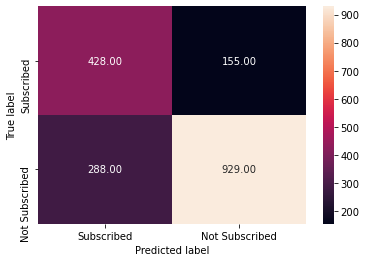

In [77]:
## Drawing the confusion matrix for KNN model 
draw_cm( test_y, pred_y )

In [67]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1217
           1       0.60      0.73      0.66       583

    accuracy                           0.75      1800
   macro avg       0.73      0.75      0.73      1800
weighted avg       0.77      0.75      0.76      1800



The *recall* of positive cases is 0.73. 

In [68]:
## The method takes the three following parameters
## model: the classification model
## test_X: X features of the test set
## test_y: actual labels of the test set
## Returns
##  - ROC Auc Score
##  - FPR and TPRs for different threshold values
def draw_roc_curve( model, test_X, test_y ):
    ## Creating and initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame( { 'actual':  test_y } )
    test_results_df = test_results_df.reset_index()

    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )

    ## selecting the probabilities that the test example belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    
    
    ## Invoke roc_curve() to return the fpr, tpr and threshold values.
    ## threshold values contain values from 0.0 to 1.0 
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,
                                           test_results_df.chd_1,
                                           drop_intermediate = False )

    ## Getting the roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1  )

    ## Setting the size of the plot
    plt.figure(figsize=(8, 6))
    ## plotting the actual fpr and tpr values 
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    ## plotting th diagnoal line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ## Setting labels and titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return auc_score, fpr, tpr, thresholds

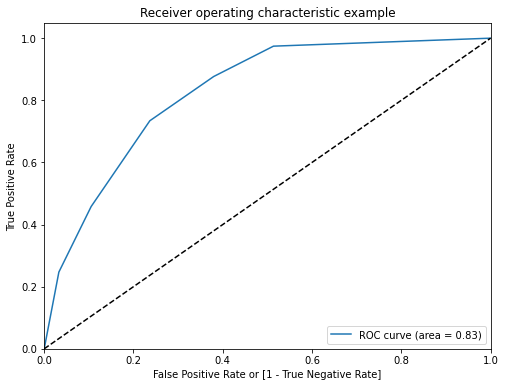

In [78]:
from sklearn.metrics import roc_auc_score

## Invoking draw_roc_curve with the KNN model
draw_roc_curve(knn_clf, test_X, test_y);

### GridSerach for most optimal parameters

- The above model accuracy is obtained by considering default number of neighbors i.e. k=5.  - K in KNN is called hyperparameter and the process of finding optimal value for a hyperparameter is called hyperparameter tuning. 

*sklearn.model_selection* provides a feature called *GridSearchCV*, which searches through a set of given hyperparameter values and reports the most optimal one. *GridSearchCV* does k-fold cross validation for each value of hyperparameter to measure accuracy and avoid overfitting. 

*GridSearchCV* takes the following parameters,

- estimator - scikit-learn model, which implements estimator interface. 
- param_grid - A dictionary with parameters names (string) as keys and lists of parameter settings to try as values.
- scoring - string - the accuracy measure e.g. 'r2' for regression models and 'f1, 'precision', 'recall' or roc_auc' for classification models.
- cv - integer - the number of folds in K-Fold

In our example, the hyperparameters and corresponding set of values for search are as follows.

- n_neighbhors - All values from 5 to 10
- metric (for distance calculation): 'canberra', 'euclidean', 'minkowski'

And the grid search to report ROC AUC score after 10 K-Fold cross validation.

In [70]:
## Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

## Creating a dictionary with hyperparameters and possible values for searching
tuned_parameters = [{'n_neighbors': range(5,10), 
                     'metric': ['canberra', 'euclidean', 'minkowski']}]

## Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')
## fit the search with training set
clf.fit(train_X, train_y )

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

Once the search is over, the best score and params can be printed as below.

In [71]:
clf.best_score_

0.8307802466383185

In [72]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

*GridSearch* suggests the best combination of parameters is *n_neighbhors=5* and *canberra* distance and the corresponding *roc_auc* score is 0.830.

## Ensemble Methods

- Ensemble methods are learning algorithms that take a set of estimators or classifiers and classify new data points by majority vote. 

- The majority voting could be based on counting simpliy the vote from each classifier or it could weighted based on their individual accuracy measures. 

<img src="ensemblenew.png" alt="Ensemble" style="width: 600px;"/>

- Ensemble methods are also used for regression problems, where the prediction of new data is simple average or weighted average of all predictions from the set of regression models.

- Multiple datasets are needed for buiding multiple classifiers. But in practice there is always one training set is available. So instead of using the same training set across all classifiers, bootstrapped samples (random samples with replacement) are drawn from the initial training set and given to each classifiers.

- Sometimes bootstrapping involves sampling features (using a subset of features) along with sampling observations. Each resampled set contains a subset of features available in the original set. Sampling features helps find important features, which is discussed in the subsequent sections in detail.


As shown, K and N are number of features and samaples in the original set, while k and n are number of features and samaples in the sampled set.

The process of boostrapping samples from original set to build multiple models and the aggregating their results for final prediction is called *Bagging*. Bagging word comes from bootstrapping plus aggregating. One of the most widely used bagging technique is *Random Forest*.

## Random Forest

- Random forest is one of the most popular ensemble techniques used in industry becuase of it's good performance and scalability. 

- A random forest is an ensemble of decision trees, where each decision tree is built from the bootstrap samples (sampled with replacement) and randomly selected subset of features without replacement. 

- The decision trees are normally grown deep. 

- The number of estimators or models to be used in Random Forest can be tuned to increase model accuracy. The hyperparameters that can be tuned in a Random Forest model are,

    - Number of Decision trees
    - Number of features to be sampled
    - and the hyperparameters that can be tuned in decision trees like tree depth and search criteria (gini or entropy)

- *RandomForestClassifier* is available in *sklearn.ensemble* and takes the following parameters.

    - n_estimators : integer - The number of trees in the forest.
    - criterion : string - The function to measure the quality of a split. Gini or entropy. Default is *gini*.
    - max_feature: int, float - The number of features to be used for each tree
        - If int, then consider max_features features at each split.
        - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
        - If “auto”, then max_features=sqrt(n_features).
        - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”). Most widely used.
        - If “log2”, then max_features=log2(n_features)    
    - max_depth : integer - The maximum depth of the tree. 

#### Buiding Random Forest Model 

Initially building a random forest model with *max_depth* 10 and *n_estimators* 10.

In [79]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

## Initializing the Random Forest Classifier with max_dept and n_estimators
radm_clf = RandomForestClassifier( max_depth=10, n_estimators=10)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=10, n_estimators=10)

Finding ROC AUC score and drawing the ROC curve using our utilitiy method *draw_roc_curve*.

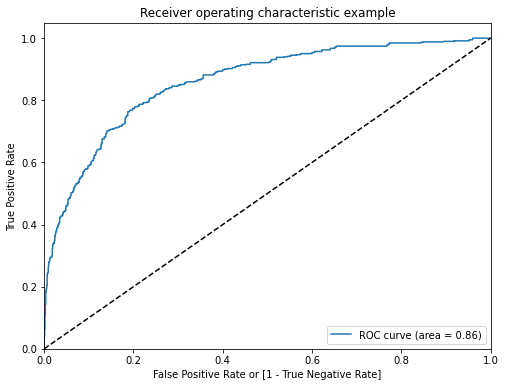

In [80]:
_, _, _, _ = draw_roc_curve( radm_clf, test_X, test_y );

AUC is 0.86 and better compared to KNN model. But we can still improve the accuracy by using grid search.

### Grid Search for Optimal Parameters

- Readers are welcome to experiment with more parameters and larger set of values for search. It may take a while for running large combination of values. So be patient!

- We will tune only the parameters *max_depth*, *n_estimators* and *max_features* and use a small set of values for search. 

    - max_depth: 10 or 15
    - n_estimators: 10 or 20
    - max_features: sqrt or auto

In [81]:
## Configuring parameters and values for searched
tuned_parameters = [{'max_depth': [10, 15],
                   'n_estimators': [10,20],
                   'max_features': ['sqrt', 'auto']}]

## Initializing the RF classifier
radm_clf = RandomForestClassifier()

## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
                 tuned_parameters,
                 cv=5,
                 scoring='roc_auc')

## Fitting the training set
clf.fit(train_X, train_y )

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15],
                          'max_features': ['sqrt', 'auto'],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

Printing the best score and best params.

In [82]:
clf.best_score_

0.9322236290914722

AUC score have reached 0.93 with the following optimal values for the hyperparameters.

In [83]:
clf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 20}

#### Drawing the confusion matrix

Drawing the confusion matrix using the utility method *draw_cm*.

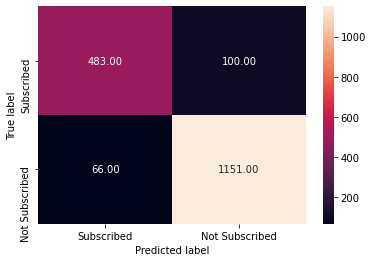

In [85]:
pred_y = clf.best_estimator_.predict( test_X )
draw_cm( test_y, pred_y )

The mode is able to detect 483 out of 583 subscribed cases and ther are only 66 *false positives* cases.

Printing the classification report

In [86]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1217
           1       0.88      0.83      0.85       583

    accuracy                           0.91      1800
   macro avg       0.90      0.89      0.89      1800
weighted avg       0.91      0.91      0.91      1800



The recall and precision for positive cases are 0.83 and 0.88 respectively, which are far better than what we obtained using KNN model.

### Finding important features

- Random forest algorithms reports feature importance by considering feature usage over all the trees in the forest. 

- Features importance is calculated for a feature by multiplying error reduction at any node by the feature with the proportion of samples reaching that node. Then the values are averaged over all the trees to find final feature importance.

- This gives good insight into which all features have important information with respect to the outcome variable.


In *sklearn* the classifiers return a parameter called *feature_importances_*, which holds the feature importance values. We will store these values along with the column names in a DataFrame and plot them in descending order of importances for better visualization and interpretation.


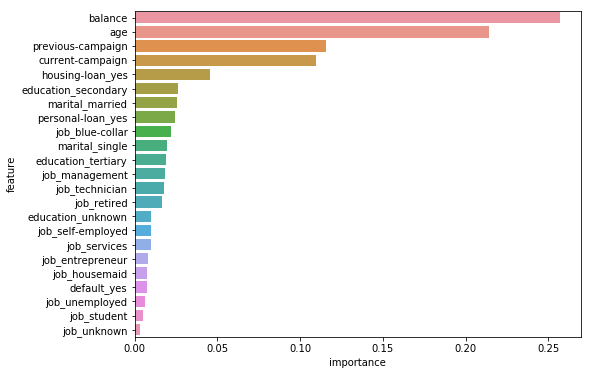

In [237]:
import numpy as np

# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns,
                               'importance': radm_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)

plt.figure(figsize=(8, 6))
# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

The top 5 features are *balance, age, previous-campaign, current-campaign and house-loan_yes*. The importance score is normalized and shows the relative importance of features. The cummulative sum of features importance can show the amount variance explained by the top 5 features.

Pandas' *cumsum()* method can be used to compute the cummulative sum as below.

In [240]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
1,balance,0.256938,25.693789
0,age,0.214292,47.122946
3,previous-campaign,0.115596,58.682579
2,current-campaign,0.109440,69.626538
21,housing-loan_yes,0.045655,74.192006
17,education_secondary,0.026044,76.796379
15,marital_married,0.025683,79.364678
22,personal-loan_yes,0.024546,81.819316
4,job_blue-collar,0.021823,84.001666
16,marital_single,0.019638,85.965419


Top 5 features provides 75% of information in the data with respect to the outcome variable. This techniques can also be used for feature selection. Random forest being a black box model, can not be interpreted. But it can be used to select a subset of features using feature importance criteria and build simpler models for interpretation.

## What we learnt:

1. What is the difference between supervised and unsupervised learning?
2. How machines learn by defining a cost function and using an optimization algorithms to minimize the cost function.
3. How grandient descent optimzation works.
4. KNN model and how it predicts outcome from looking into the neighbors.
5. Ensemble techniques like Random Forest, which uses many decision trees.
9. Finding features importance using ensemble techniques.